In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Exploratory Data Anaysis
- Importing the original dataset
- Checking the number of rows and columns of the dataset
- Checking the total of null values per columns
- Checking the total of unique values per column

In [2]:
#df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
#################################
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081506.csv') # df KNOWN
#df_unknown = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27 (1) (1).xlsx')
df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202304040839.csv') # df MIX
###################
#
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
pd.set_option('display.max_colwidth', None)
df = df.head(10000)
#df_unknown = df_unknown.head(10000)
#df.head(5)

In [3]:
#df_unknown.head(3) ===================================

In [4]:
df.head(6)

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name
0,DI3993,A6ce4d1f08a353561b8f6c65a86466cd7,Tb4ca9ff87e3530229e5bbd8c7db1584c,50.00,USD,Withdrawal Home Banking,Transfer To Loan 04 Internet Access 03/21/2023 08:33 *,NaN,2023-03-21,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-03-24,FTS_CSLK_TRANSAC_20230323_100006.csv,Interior Federal Credit Union
1,DI5441,A1c3be28d42c63f168c443d3d0eeef2e8,Tc964706bddbd3e73887d20259c1e2a3f,32.50,USD,POS Withdrawal (FIS) Scotties,Pub Scotties Pub Fall River MA(1737),NaN,2022-02-14,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-02-16,FTS_CSLK_TRANSAC_20220215_100002.csv,Bankfive
2,DI3468,Aab56aacf857430508ed451a92ae5da52,Ta9c6c455b4dd3468b34a7cf1b4664f68,25.91,USD,DEBIT CARD DEBIT,03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*,NaN,2023-03-20,12734.0,TARGET,Unknow Payment Agent,NaN,2023-03-21,FTS_CSLK_TRANSAC_20230320_100006.csv,Neighbors Credit Union
3,DI1384,A69ae2ce38695317e80569bb44391df73,T5d329e1f27bf33d78118e048504e17f1,1.00,USD,Withdrawal PFCU Check Card,AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351,NaN,2023-01-19,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-01-22,FTS_CSLK_TRANSAC_20230121_100007.csv,Philadelphia Fcu
4,DI4049,A4e1f6c47cafa375daec1e1e4fc785bb3,Te2228303ae563e96bd3b6d7a63a39dce,6.12,USD,PURCHASE,auth #* 02-18-2023 STARBUCKS STORE RENO NV *,NV,2023-02-20,12634.0,STARBUCKS,Unknow Payment Agent,NaN,2023-02-22,FTS_CSLK_TRANSAC_20230221_100006.csv,Noble Credit Union
5,DI3658,Ae79ffe7bd6303dc4ad6ed27ea60cb8a3,T4305b65fe296312ea75af321e76ae304,84.36,USD,Point Of Sale Withdrawal,Walmart.com Bentonville ARUS,NaN,2022-07-22,13085.0,WALMART,Unknow Payment Agent,NaN,2022-07-29,FTS_CSLK_TRANSAC_20220728_100006.csv,COLUMBIA CREDIT UNION


In [5]:
# Concatenating transaction descriptions columns
df["TRANSACTION_DETAILS"] = df['txn_desc1'].astype(str) +" %%%%% "+ df['txn_desc2'].astype(str)

In [6]:
#df_unknown["TRANSACTION_DETAILS"] = df_unknown['txn_desc1'].astype(str) +" %%%%% "+ df_unknown['txn_desc2'].astype(str) ===================================

In [7]:
#df["LEN_WORDS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [8]:
#df["LEN_WORDS"].describe()

In [9]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 17)


In [10]:
#print('Total number of rows and columns (UNKNOWN):', df_unknown.shape) ===================================

In [11]:
print('Total number of null values per column:')
df.isnull().sum()
#df.dropna(inplace=True)

Total number of null values per column:


fi_id                       0
account_id                  0
transaction_id              0
amount                      0
currency                    0
txn_desc1                   2
txn_desc2                1016
region                   8623
transaction_timestamp       0
merchant_id              5134
merchant_name               0
payment_agent               0
payment_agent_id         8984
extract_date                0
filename                    0
name                        0
TRANSACTION_DETAILS         0
dtype: int64

In [12]:
print('Total number of unique values per column:')
df.nunique()

Total number of unique values per column:


fi_id                      164
account_id                9403
transaction_id           10000
amount                    5077
currency                     1
txn_desc1                 4091
txn_desc2                 8186
region                      46
transaction_timestamp      530
merchant_id                517
merchant_name              518
payment_agent               15
payment_agent_id            27
extract_date               504
filename                   546
name                       164
TRANSACTION_DETAILS       9466
dtype: int64

# Unknown Merchant Names
- Selecting dataset with unknown merchants only
- Checking the number of rows and columns

In [13]:
# Selecting only known merchants names from the original dataset
#df_unknown_merchs = df_unknown[['transaction_id','TRANSACTION_DETAILS','merchant_name' ]].copy(deep=True) =================================
#df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
#print('Total number of rows and columns:', df_unknown_merchs.shape) ===================================

In [14]:
#df_unknown_merchs ===================================

In [15]:
#df_unknown_merchs.shape ===================================

In [16]:
#print('Total number of known merchants:\n',len(df_unknown_merchs.merchant_name.unique())) ===================================

In [17]:
#print('Total number of occurences per merchant name (UNKNOWN):\n',(df_unknown_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%') ===================================

In [18]:

# Copy of the afs merchant names column
#df_unknown_merchs['AFS_MECHANT_NAMES'] = df_unknown_merchs['merchant_name'] ===================================
# Droping original cols
#df_unknown_merchs = df_unknown_merchs.drop(['merchant_name'], axis=1) ===================================

In [19]:
# ===================================
# df_unknown_merchs_pred = df_unknown_merchs.copy(deep=True)
# df_unknown_merchs_pred['AFS_MECHANT_NAMES'] = df_unknown_merchs_pred['AFS_MECHANT_NAMES'].str.lower()
# df_unknown_merchs_pred['TRANSACTION_DETAILS']= df_unknown_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [20]:
#df_unknown_merchs.head(3) ===================================

In [21]:
#df_unknown_merchs_pred.head(5) ===================================

# Known Merchant Names
- Selecting known merchants only 
- Checking the number of rows/transactions
- Checking the total number of merchants
- Checking the total number of occurrences per merchant
- Concatenated the transaction details columns
- Defined a function for word cloud for top merchants
- Defined a function for N-gram for top merchants with combined names
- Defined a function to check occurence of merchants in transaction columns

In [22]:
# Selecting only known merchants names from the original dataset
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
#df_known_merchs = df_known_merchs[df["merchant_name"].str.contains("Unknow Merchant") == False] ===================================
#######
df_known_merchs_cp2 = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
#df_known_merchs_cp2 = df_known_merchs_cp2[df["merchant_name"].str.contains("Unknow Merchant") == False] ===================================

#df_known_merchs = df_known_merchs.head(50)

In [23]:
print('Number of transactions with known merchant names:\n',len(df_known_merchs) )

Number of transactions with known merchant names:
 10000


In [24]:
print('Total number of known merchants:\n',len(df_known_merchs.merchant_name.unique()))

Total number of known merchants:
 518


In [25]:
#print('Total number of UNknown merchants:\n',len(df_known_merchs.merchant_name.unique())) ===================================
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts())

Total number of occurences per merchant name:
 Unknow Merchant    5139
AMAZON.COM          436
WALMART             310
MCDONALD'S          160
APPLE STORE         139
                   ... 
GOG.COM               1
DOORDASH              1
RALEY'S               1
WHITE CASTLE          1
HUDSON                1
Name: merchant_name, Length: 518, dtype: int64


In [26]:
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 Unknow Merchant    51.4%
AMAZON.COM          4.4%
WALMART             3.1%
MCDONALD'S          1.6%
APPLE STORE         1.4%
                   ...  
GOG.COM             0.0%
DOORDASH            0.0%
RALEY'S             0.0%
WHITE CASTLE        0.0%
HUDSON              0.0%
Name: merchant_name, Length: 518, dtype: object


In [27]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [28]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,Withdrawal Home Banking,Transfer To Loan 04 Internet Access 03/21/2023 08:33 *,Unknow Payment Agent,Unknow Merchant,Withdrawal Home Banking %%%%% Transfer To Loan 04 Internet Access 03/21/2023 08:33 *
1,Tc964706bddbd3e73887d20259c1e2a3f,POS Withdrawal (FIS) Scotties,Pub Scotties Pub Fall River MA(1737),Unknow Payment Agent,Unknow Merchant,POS Withdrawal (FIS) Scotties %%%%% Pub Scotties Pub Fall River MA(1737)
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,DEBIT CARD DEBIT,03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*,Unknow Payment Agent,TARGET,DEBIT CARD DEBIT %%%%% 03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*
3,T5d329e1f27bf33d78118e048504e17f1,Withdrawal PFCU Check Card,AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351,Unknow Payment Agent,Unknow Merchant,Withdrawal PFCU Check Card %%%%% AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351
4,Te2228303ae563e96bd3b6d7a63a39dce,PURCHASE,auth #* 02-18-2023 STARBUCKS STORE RENO NV *,Unknow Payment Agent,STARBUCKS,PURCHASE %%%%% auth #* 02-18-2023 STARBUCKS STORE RENO NV *


In [29]:
#df_known_merchs["LEN_WORDS"] = df_known_merchs["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))


In [30]:
#df_known_merchs["LEN_WORDS"].describe()

In [31]:
#df_known_merchs["LEN_TOKENS"] = df_known_merchs["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [32]:
#df_known_merchs["LEN_TOKENS"].describe()

In [33]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,Withdrawal Home Banking,Transfer To Loan 04 Internet Access 03/21/2023 08:33 *,Unknow Payment Agent,Unknow Merchant,Withdrawal Home Banking %%%%% Transfer To Loan 04 Internet Access 03/21/2023 08:33 *
1,Tc964706bddbd3e73887d20259c1e2a3f,POS Withdrawal (FIS) Scotties,Pub Scotties Pub Fall River MA(1737),Unknow Payment Agent,Unknow Merchant,POS Withdrawal (FIS) Scotties %%%%% Pub Scotties Pub Fall River MA(1737)
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,DEBIT CARD DEBIT,03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*,Unknow Payment Agent,TARGET,DEBIT CARD DEBIT %%%%% 03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*
3,T5d329e1f27bf33d78118e048504e17f1,Withdrawal PFCU Check Card,AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351,Unknow Payment Agent,Unknow Merchant,Withdrawal PFCU Check Card %%%%% AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351
4,Te2228303ae563e96bd3b6d7a63a39dce,PURCHASE,auth #* 02-18-2023 STARBUCKS STORE RENO NV *,Unknow Payment Agent,STARBUCKS,PURCHASE %%%%% auth #* 02-18-2023 STARBUCKS STORE RENO NV *


In [34]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

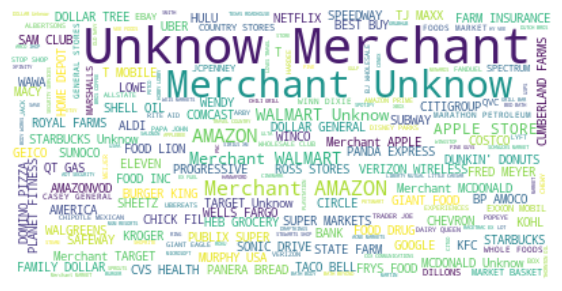

In [35]:
# Copy of the afs merchant names column
df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent'] 
# Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

# Word cloud for more frequent merchant names
word_cloud(df_known_merchs.AFS_MECHANT_NAMES)

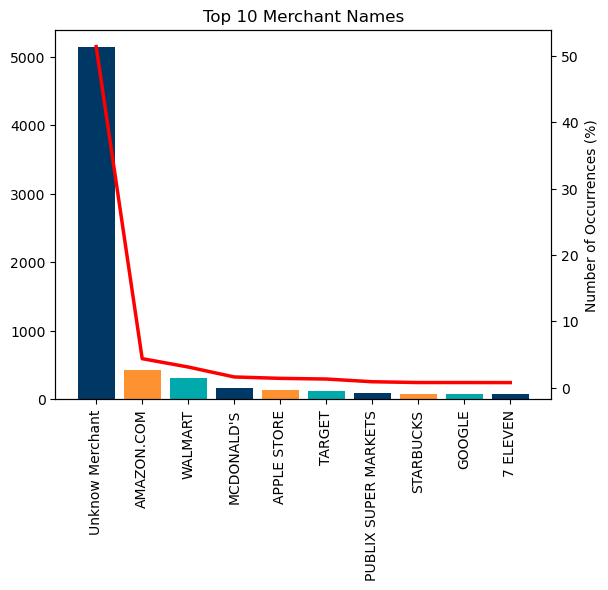

In [36]:
#df = pd.read_csv('data.csv')
top_categories = df['merchant_name'].value_counts().nlargest(10)
category_percentages = top_categories / len(df) * 100

# Define a custom color palette
colors = ['#003865', '#FF9230', '#00A9AB']

plt.xticks(rotation=90)
plt.bar(top_categories.index, top_categories.values, align='center', color=colors)

ax2 = plt.twinx()
#ax2.set_ylim([0, 100])
ax2.plot(category_percentages.index, category_percentages.values, color='red', linewidth=2.5)
ax2.set_ylabel('Percentage')

plt.xlabel('Category')
plt.ylabel('Number of Occurrences (%)')
plt.title('Top 10 Merchant Names')

plt.show()

In [37]:
df_known_merchs.head(6)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,Withdrawal Home Banking %%%%% Transfer To Loan 04 Internet Access 03/21/2023 08:33 *,Unknow Payment Agent,Unknow Merchant
1,Tc964706bddbd3e73887d20259c1e2a3f,POS Withdrawal (FIS) Scotties %%%%% Pub Scotties Pub Fall River MA(1737),Unknow Payment Agent,Unknow Merchant
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,DEBIT CARD DEBIT %%%%% 03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*,Unknow Payment Agent,TARGET
3,T5d329e1f27bf33d78118e048504e17f1,Withdrawal PFCU Check Card %%%%% AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351,Unknow Payment Agent,Unknow Merchant
4,Te2228303ae563e96bd3b6d7a63a39dce,PURCHASE %%%%% auth #* 02-18-2023 STARBUCKS STORE RENO NV *,Unknow Payment Agent,STARBUCKS
5,T4305b65fe296312ea75af321e76ae304,Point Of Sale Withdrawal %%%%% Walmart.com Bentonville ARUS,Unknow Payment Agent,WALMART


In [38]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

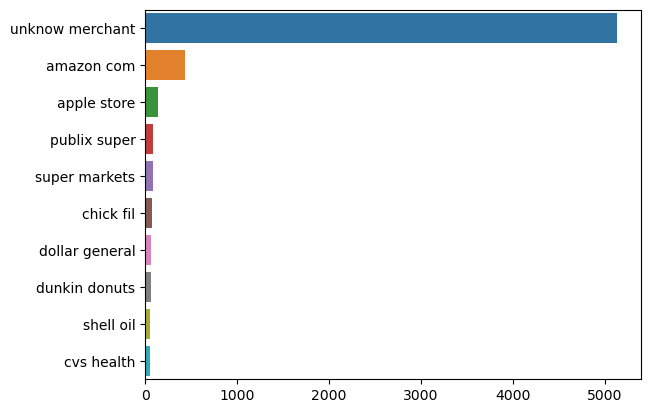

In [39]:
top_n_bigrams=get_top_ngram(df_known_merchs['AFS_MECHANT_NAMES'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x);

In [40]:
def check_names(merchant, t_details):
    
    # Variations for merchant name column
    merchant_1 = merchant
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/%]', ' ', merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + merchant.split()
    
    # Variations for transaction details column
    t_details_1 = t_details
    t_details_2 = t_details.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/%]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
    
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + t_details.split() + date_pattern.split()
    
    # Conditions to check if words are in transaction strings
    if (merchant in t_details_3 or t_details_3 in merchant or           #VEEEEEERRRR  merchant in t_details_3 or t_details_3 in merchant or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
        (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
        (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
        (any(item in merch_list for item in details_lis_1)) or
        (merchant_1[:4] in t_details_1)):
        return True
    else:
        return False
    

- Checked the occurrence of merchants in the first and secod transation colums separately
- Checked the total number of occurrences per column

In [41]:
# Merchants in the txt_1 or txt_2 columns
df_known_merchs_cp2['txn_desc2'] = df_known_merchs_cp2['txn_desc2'].astype(str)
df_known_merchs_cp2['txn_desc1'] = df_known_merchs_cp2['txn_desc1'].astype(str)
df_known_merchs_cp2['merchant_name'] = df_known_merchs_cp2['merchant_name'].astype(str)
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc1), axis=1) # OR txn_desc2
df_known_merchs_cp2.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,CHECK_MERCH_TRA_cp
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,Withdrawal Home Banking,Transfer To Loan 04 Internet Access 03/21/2023 08:33 *,Unknow Payment Agent,Unknow Merchant,False
1,Tc964706bddbd3e73887d20259c1e2a3f,POS Withdrawal (FIS) Scotties,Pub Scotties Pub Fall River MA(1737),Unknow Payment Agent,Unknow Merchant,False
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,DEBIT CARD DEBIT,03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*,Unknow Payment Agent,TARGET,False
3,T5d329e1f27bf33d78118e048504e17f1,Withdrawal PFCU Check Card,AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351,Unknow Payment Agent,Unknow Merchant,False
4,Te2228303ae563e96bd3b6d7a63a39dce,PURCHASE,auth #* 02-18-2023 STARBUCKS STORE RENO NV *,Unknow Payment Agent,STARBUCKS,False


In [42]:
print('Total of transactions with known merchants:\n',len(df_known_merchs_cp2))

Total of transactions with known merchants:
 10000


In [43]:
print('Merchant name occurrence in txn_desc1 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc1 column:
 2243


In [44]:
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc2), axis=1)
print('Merchant name occurrence in txn_desc2 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc2 column:
 3605


- Checked occurrence of merchants in concatenated transaction column
- Created CHECK_MERCH_TRA to inspect occurrences
- Checked total number of occurences in merchant details coolumn

In [45]:
# Checking if merchant names are mentioned in the transaction description
df_known_merchs['CHECK_MERCH_TRA'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
df_known_merchs.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,Withdrawal Home Banking %%%%% Transfer To Loan 04 Internet Access 03/21/2023 08:33 *,Unknow Payment Agent,Unknow Merchant,False
1,Tc964706bddbd3e73887d20259c1e2a3f,POS Withdrawal (FIS) Scotties %%%%% Pub Scotties Pub Fall River MA(1737),Unknow Payment Agent,Unknow Merchant,False
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,DEBIT CARD DEBIT %%%%% 03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*,Unknow Payment Agent,TARGET,True
3,T5d329e1f27bf33d78118e048504e17f1,Withdrawal PFCU Check Card %%%%% AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351,Unknow Payment Agent,Unknow Merchant,False
4,Te2228303ae563e96bd3b6d7a63a39dce,PURCHASE %%%%% auth #* 02-18-2023 STARBUCKS STORE RENO NV *,Unknow Payment Agent,STARBUCKS,True


In [46]:
# Merchant name in the transaction description
print('Merchant name in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == True).sum() )

Merchant name in the transaction description:
 5105


- Created a copy to encode CHECK_MERCH_TRA results
- Created a chart to compare the results
- Created a word cloud of AFS_MECHANT_NAMES to get most frequen merchants
- Checked how many times merchants are mentioned in transaction details
- Checked how many times merchants are not in transaction details
- Created word cloud for merchants not in transaction details 

In [47]:
df_known_merchs_cp = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_PAYMENT_AGENTS','AFS_MECHANT_NAMES','CHECK_MERCH_TRA']].copy(deep=True)
df_known_merchs_cp.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,Withdrawal Home Banking %%%%% Transfer To Loan 04 Internet Access 03/21/2023 08:33 *,Unknow Payment Agent,Unknow Merchant,False
1,Tc964706bddbd3e73887d20259c1e2a3f,POS Withdrawal (FIS) Scotties %%%%% Pub Scotties Pub Fall River MA(1737),Unknow Payment Agent,Unknow Merchant,False
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,DEBIT CARD DEBIT %%%%% 03-17-2023 WWW.TARGET.COM BROOKLYN PARK MN auth #*,Unknow Payment Agent,TARGET,True
3,T5d329e1f27bf33d78118e048504e17f1,Withdrawal PFCU Check Card %%%%% AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351,Unknow Payment Agent,Unknow Merchant,False
4,Te2228303ae563e96bd3b6d7a63a39dce,PURCHASE %%%%% auth #* 02-18-2023 STARBUCKS STORE RENO NV *,Unknow Payment Agent,STARBUCKS,True


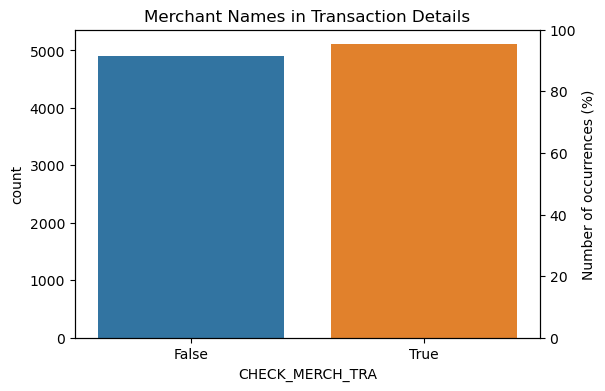

In [48]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="CHECK_MERCH_TRA", data=df_known_merchs_cp)
plt.title("Merchant Names in Transaction Details")

total = len(df_known_merchs_cp["CHECK_MERCH_TRA"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.1
    y = p.get_y() + p.get_height()/2

ax2 = ax.twinx()
ax2.set_ylim([0, 100])
ax2.set_ylabel('Number of occurrences (%)')

plt.show()

In [49]:
print('Percentage of merchant names in T details or not (1/0):\n',(df_known_merchs_cp.CHECK_MERCH_TRA).value_counts(normalize=True).mul(100).round(1).astype(str) + '%');

Percentage of merchant names in T details or not (1/0):
 True     51.0%
False    48.9%
Name: CHECK_MERCH_TRA, dtype: object


In [50]:
# Number of merchant names in transaction details
df_check_true = pd.DataFrame()
df_check_true = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == True]
print('Number of merchant names in transaction details:\n',len(df_check_true))

Number of merchant names in transaction details:
 5105


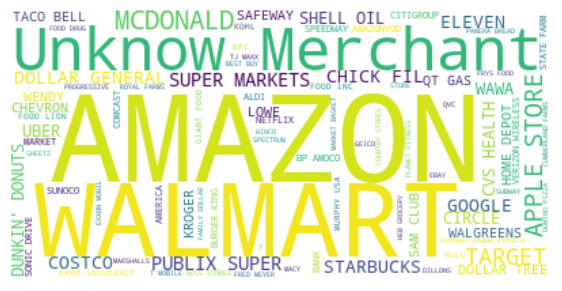

In [51]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description

word_cloud(df_check_true.AFS_MECHANT_NAMES)

In [52]:
print('Total number of occurences per merchant name:\n',(df_check_true.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM         8.5%
WALMART            6.1%
Unknow Merchant    5.8%
MCDONALD'S         3.1%
APPLE STORE        2.7%
                   ... 
Z GALLERIE         0.0%
GOG.COM            0.0%
DOORDASH           0.0%
RALEY'S            0.0%
HUDSON             0.0%
Name: AFS_MECHANT_NAMES, Length: 514, dtype: object


In [53]:
print('Number of merchant names NOT in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == False).sum())

Number of merchant names NOT in the transaction description:
 4895


In [54]:
# Number of merchant names not in transaction details
df_check_false = pd.DataFrame()
df_check_false = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == False]
#print('Number of merchant names NOT in the transaction description:\n', len(df_check_false))

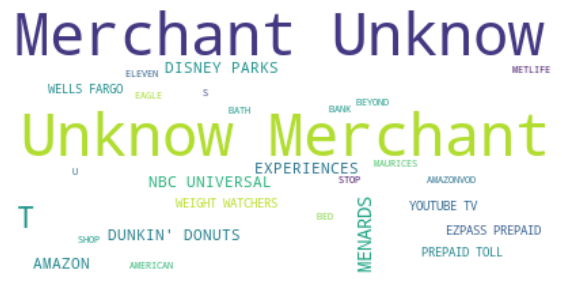

In [55]:
# Word cloud for more frequent merchant names WHEN merchant name is NOT in transaction description
word_cloud(df_check_false.AFS_MECHANT_NAMES)

In [56]:
print('Total number of occurences per merchant name WHEN merchant name is NOT in transation details:\n', (df_check_false.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name WHEN merchant name is NOT in transation details:
 Unknow Merchant                 98.9%
AT&T                             0.4%
MENARDS                          0.1%
AMAZON.COM                       0.1%
NBC UNIVERSAL                    0.1%
DISNEY PARKS AND EXPERIENCES     0.1%
DUNKIN' DONUTS                   0.1%
WEIGHT WATCHERS                  0.0%
EZPASS PREPAID TOLL              0.0%
YOUTUBE TV                       0.0%
WELLS FARGO                      0.0%
METLIFE                          0.0%
AMAZONVOD                        0.0%
7 ELEVEN                         0.0%
BED BATH & BEYOND                0.0%
U.S. BANK                        0.0%
MAURICES                         0.0%
AMERICAN EAGLE                   0.0%
STOP & SHOP                      0.0%
Name: AFS_MECHANT_NAMES, dtype: object


- Merchant names not mentioned in transaction description

In [57]:
# Merchant names not mentioned in transaction description
df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA']==False] 


,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,Withdrawal Home Banking %%%%% Transfer To Loan 04 Internet Access 03/21/2023 08:33 *,Unknow Payment Agent,Unknow Merchant,False
1,Tc964706bddbd3e73887d20259c1e2a3f,POS Withdrawal (FIS) Scotties %%%%% Pub Scotties Pub Fall River MA(1737),Unknow Payment Agent,Unknow Merchant,False
3,T5d329e1f27bf33d78118e048504e17f1,Withdrawal PFCU Check Card %%%%% AXS.COMLIVE EVENT 888-929-7849 CA Date 01/19/23 ***92705 7922 %% Card 30 #4351,Unknow Payment Agent,Unknow Merchant,False
6,Tcb0b6c637f7839fd8b7b23be236c1e3f,Withdrawal Visa Debit Card %%%%% STEVI BS PIZZA BUFFET DOUGLASVILLE GA Date 07/11/22 0 *0548 5 5812 %% Card 15 #3008,Unknow Payment Agent,Unknow Merchant,False
9,T88746fe990033caab9b8590fc84b4d74,SNACK SODA VENDING DBT CRD 1930 02/06/23 *22 MADISONMS %%%%% nan,Unknow Payment Agent,Unknow Merchant,False
...,...,...,...,...,...
9990,Tc8fb82b314543899a9d64e32a0a139c3,POS PURCHASE * HOTELBOOKINGSE *9059 UT %%%%% nan,Unknow Payment Agent,Unknow Merchant,False
9995,T2c7cdb48985e3569a524f219b7ec3a4a,Withdrawal Signature base %%%%% BEST STORAGE HENDERSON 702-*7 NV Date 01/25/23 ***05360 4225 %% Card 25 #0531,Unknow Payment Agent,Unknow Merchant,False
9996,Tb1b031f37d4e3ce0a8694effead5bc8d,POS PURCHASE ON 00/00 @ 00:00 %%%%% LOCATION + ATM HST NOT AV AILABLE,Unknow Payment Agent,Unknow Merchant,False
9998,Tdbf944aa317a30639b0fd6b45734d099,TST* COSTA VIDA - PAYS PAYS US %%%%% nan,Unknow Payment Agent,Unknow Merchant,False


# Payment Agents VS Merchant Names
- Selected known payment agents
- Checked number of total occurences per agents
- Checked total number of payment agents
- Checked number of transactions with known payment agents
- Defined a function compare payment agents with merchant names
- Created CHECK_MERCH_AGTS to check when agents and merchants are same
- Checked Totals for different situations

In [58]:
df_known_payment_agents = df_known_merchs.copy(deep=True)
# Known payment agent names
df_known_payment_agents = df_known_payment_agents.loc[df_known_payment_agents['AFS_PAYMENT_AGENTS'] != 'Unknow Payment Agent']
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
27,T5379e52151ca3c77a2819d1e36beee01,DBT PURCHASE ON 03/24 @ 14:38 %%%%% SQ *SELWYN ACK SQ *SELWYN ACKIE gosq.com MD CARD NBR: -5580,SQUARE,Unknow Merchant,False
36,T697f886d5bd031329039cc8beb6f00e4,DBT PURCHASE ON 02/28 @ 17:21 %%%%% SQ *FOG & FERN COFFEE Lacey WA CARD NBR: -0715,SQUARE,Unknow Merchant,False
55,T5ab5227b8a64316ba8d175b354ae8fbf,Withdrawal MCSIGNATURE %%%%% SQ *BULL DOGS Armagh PA Date 07/08/22 ***43285 5814 %% Card 19 #2417,SQUARE,Unknow Merchant,False
85,T221c9442f91a3e41b77501f23f179a1f,ACH Withdrawal %%%%% PAYPAL PAYPALSI77 INST XFER * INSTANT TRANSFER **753,PAYPAL,Unknow Merchant,False
91,T002eb8896f203144a45692208db9c67d,Point Of Sale Withdrawal %%%%% GOOGLE *Standard Chg.co/helppay# CAUS,GOOGLE,GOOGLE,True
...,...,...,...,...,...
9977,T44383d034cbe3f51b2abfdc78858e467,Withdrawal DEBIT CARD %%%%% DOORDASH*CHICK-FIL-A WWW.DOORDASH. CA Date 11/22/22 ***35650 5812,DOORDASH,CHICK-FIL-A,True
9978,T5f4e60c344093a2288817a28852ff518,Withdrawal VENMO %%%%% TYPE: PAYMENT ID: *1992 CO: VENMO NAME: ANA PARRAS %% ACH Trace **323,VENMO,Unknow Merchant,False
9980,T088c5bccedfe3d81a5908426c63d53e3,DBT PURCHASE ON 03/22 @ 17:27 %%%%% SQ *EVERGREEN VALLEY E Olympia WA CARD NBR: -4114,SQUARE,Unknow Merchant,False
9985,T3c264e32a4d230fabd5f0fc0c8032ea5,Withdrawal PAYPAL %%%%% TYPE: INST XFER ID: PAYPALSI77 CO: PAYPAL,PAYPAL,Unknow Merchant,False


In [59]:
print('Number of total occurences per payment agents:\n', (df_known_payment_agents.AFS_PAYMENT_AGENTS).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Number of total occurences per payment agents:
 PAYPAL             32.5%
SQUARE CASH APP    20.0%
SQUARE             15.8%
VENMO              14.2%
GOOGLE              6.4%
DOORDASH            4.6%
INSTACART           1.6%
APPLE CASH          1.4%
ROKU                0.9%
GRUBHUB.COM         0.9%
FACEBOOK            0.7%
LEVELUP             0.7%
OLO                 0.3%
PRICELINE           0.1%
Name: AFS_PAYMENT_AGENTS, dtype: object


In [60]:
print('Total number of payment agents:\n',len(df_known_payment_agents.AFS_PAYMENT_AGENTS.unique()))

Total number of payment agents:
 14


In [61]:
print('Number of transactions with known payment agents:\n',len(df_known_payment_agents))

Number of transactions with known payment agents:
 876


In [62]:
# Function to compare payment agent names with merchant names
def compare_occurences(agent, merchant):
    agent = agent.split()
    merchant = merchant.split()
    # Conditions to check if words are in transaction strings
    if (merchant in agent or agent in merchant or
        (any(item in merchant for item in agent)) or
        (merchant[:3] in agent)):
        return True
    else:
        return False

In [63]:
# Checking if merchant names and payment agents are same
df_known_payment_agents['CHECK_MERCH_AGTS'] = df_known_payment_agents.apply(lambda x: compare_occurences(x.AFS_MECHANT_NAMES, x.AFS_PAYMENT_AGENTS), axis=1)
df_known_payment_agents.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
27,T5379e52151ca3c77a2819d1e36beee01,DBT PURCHASE ON 03/24 @ 14:38 %%%%% SQ *SELWYN ACK SQ *SELWYN ACKIE gosq.com MD CARD NBR: -5580,SQUARE,Unknow Merchant,False,False
36,T697f886d5bd031329039cc8beb6f00e4,DBT PURCHASE ON 02/28 @ 17:21 %%%%% SQ *FOG & FERN COFFEE Lacey WA CARD NBR: -0715,SQUARE,Unknow Merchant,False,False
55,T5ab5227b8a64316ba8d175b354ae8fbf,Withdrawal MCSIGNATURE %%%%% SQ *BULL DOGS Armagh PA Date 07/08/22 ***43285 5814 %% Card 19 #2417,SQUARE,Unknow Merchant,False,False
85,T221c9442f91a3e41b77501f23f179a1f,ACH Withdrawal %%%%% PAYPAL PAYPALSI77 INST XFER * INSTANT TRANSFER **753,PAYPAL,Unknow Merchant,False,False
91,T002eb8896f203144a45692208db9c67d,Point Of Sale Withdrawal %%%%% GOOGLE *Standard Chg.co/helppay# CAUS,GOOGLE,GOOGLE,True,True


In [64]:
print('Same merchant names and payment agents:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==True]))

Same merchant names and payment agents:
 72


- Checked how many times merchant names and payment agents are same
- Checked how many time merchant names and payment agents are different
- Checked total number of transactions with known agents

In [65]:
print('Merchant names and payment agents are diferent:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==False]))

Merchant names and payment agents are diferent:
 804


In [66]:
print('Number of rows with known Agents:\n',len(df_known_payment_agents))

Number of rows with known Agents:
 876


In [67]:
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
27,T5379e52151ca3c77a2819d1e36beee01,DBT PURCHASE ON 03/24 @ 14:38 %%%%% SQ *SELWYN ACK SQ *SELWYN ACKIE gosq.com MD CARD NBR: -5580,SQUARE,Unknow Merchant,False,False
36,T697f886d5bd031329039cc8beb6f00e4,DBT PURCHASE ON 02/28 @ 17:21 %%%%% SQ *FOG & FERN COFFEE Lacey WA CARD NBR: -0715,SQUARE,Unknow Merchant,False,False
55,T5ab5227b8a64316ba8d175b354ae8fbf,Withdrawal MCSIGNATURE %%%%% SQ *BULL DOGS Armagh PA Date 07/08/22 ***43285 5814 %% Card 19 #2417,SQUARE,Unknow Merchant,False,False
85,T221c9442f91a3e41b77501f23f179a1f,ACH Withdrawal %%%%% PAYPAL PAYPALSI77 INST XFER * INSTANT TRANSFER **753,PAYPAL,Unknow Merchant,False,False
91,T002eb8896f203144a45692208db9c67d,Point Of Sale Withdrawal %%%%% GOOGLE *Standard Chg.co/helppay# CAUS,GOOGLE,GOOGLE,True,True
...,...,...,...,...,...,...
9977,T44383d034cbe3f51b2abfdc78858e467,Withdrawal DEBIT CARD %%%%% DOORDASH*CHICK-FIL-A WWW.DOORDASH. CA Date 11/22/22 ***35650 5812,DOORDASH,CHICK-FIL-A,True,False
9978,T5f4e60c344093a2288817a28852ff518,Withdrawal VENMO %%%%% TYPE: PAYMENT ID: *1992 CO: VENMO NAME: ANA PARRAS %% ACH Trace **323,VENMO,Unknow Merchant,False,False
9980,T088c5bccedfe3d81a5908426c63d53e3,DBT PURCHASE ON 03/22 @ 17:27 %%%%% SQ *EVERGREEN VALLEY E Olympia WA CARD NBR: -4114,SQUARE,Unknow Merchant,False,False
9985,T3c264e32a4d230fabd5f0fc0c8032ea5,Withdrawal PAYPAL %%%%% TYPE: INST XFER ID: PAYPALSI77 CO: PAYPAL,PAYPAL,Unknow Merchant,False,False


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [68]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [69]:
df_known_merchs_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,withdrawal home banking %%%%% transfer to loan 04 internet access 03/21/2023 08:33,Unknow Payment Agent,unknow merchant,False
1,Tc964706bddbd3e73887d20259c1e2a3f,pos withdrawal (fis) scotties %%%%% pub scotties pub fall river ma(1737),Unknow Payment Agent,unknow merchant,False
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,debit card debit %%%%% 03-17-2023 www.target.com brooklyn park mn auth,Unknow Payment Agent,target,True
3,T5d329e1f27bf33d78118e048504e17f1,withdrawal pfcu check card %%%%% axs.comlive event 888-929-7849 ca date 01/19/23 92705 7922 %% card 30 4351,Unknow Payment Agent,unknow merchant,False
4,Te2228303ae563e96bd3b6d7a63a39dce,purchase %%%%% auth 02-18-2023 starbucks store reno nv,Unknow Payment Agent,starbucks,True
5,T4305b65fe296312ea75af321e76ae304,point of sale withdrawal %%%%% walmart.com bentonville arus,Unknow Payment Agent,walmart,True
6,Tcb0b6c637f7839fd8b7b23be236c1e3f,withdrawal visa debit card %%%%% stevi bs pizza buffet douglasville ga date 07/11/22 0 0548 5 5812 %% card 15 3008,Unknow Payment Agent,unknow merchant,False
7,Tbd10f847fcf03d7886814da94dfab29c,withdrawal debit cci care.com %%%%% 737- 4 maus,Unknow Payment Agent,care.com,True
8,T951b0a621b063d09b7a7caeadb228ebf,electronic withdrawal %%%%% fidelity moneyline,Unknow Payment Agent,fidelity,True
9,T88746fe990033caab9b8590fc84b4d74,snack soda vending dbt crd 1930 02/06/23 22 madisonms %%%%% nan,Unknow Payment Agent,unknow merchant,False


- Function to find and create a list of patterns

In [70]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    # #print(patterns)
    #patterns.append(listb)
    #print(patterns)


    return patterns

In [71]:
patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

- Function to find organisations using patterns

In [72]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_sm")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip', 'ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840','pd1387','ma(9661','ns4qa9xb3 ']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

- Function for parallel processing

In [73]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [74]:
df_known_merchs_pred.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,withdrawal home banking %%%%% transfer to loan 04 internet access 03/21/2023 08:33,Unknow Payment Agent,unknow merchant,False
1,Tc964706bddbd3e73887d20259c1e2a3f,pos withdrawal (fis) scotties %%%%% pub scotties pub fall river ma(1737),Unknow Payment Agent,unknow merchant,False
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,debit card debit %%%%% 03-17-2023 www.target.com brooklyn park mn auth,Unknow Payment Agent,target,True
3,T5d329e1f27bf33d78118e048504e17f1,withdrawal pfcu check card %%%%% axs.comlive event 888-929-7849 ca date 01/19/23 92705 7922 %% card 30 4351,Unknow Payment Agent,unknow merchant,False
4,Te2228303ae563e96bd3b6d7a63a39dce,purchase %%%%% auth 02-18-2023 starbucks store reno nv,Unknow Payment Agent,starbucks,True


In [75]:
t_list = df_known_merchs_pred[['transaction_id', 'TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES', 'CHECK_MERCH_TRA']].copy(deep=True).to_dict(orient='records') #replace similarity w unique ID

In [76]:
# df_known_merchs_pred['PREDICTIONS'] = df_known_merchs_pred.TRANSACTION_DETAILS.swifter.apply(find_org)

In [77]:
#par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

In [78]:
#df_known_merchs_pred = pd.DataFrame(par)

In [79]:
df_known_merchs_pred

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,withdrawal home banking %%%%% transfer to loan 04 internet access 03/21/2023 08:33,Unknow Payment Agent,unknow merchant,False
1,Tc964706bddbd3e73887d20259c1e2a3f,pos withdrawal (fis) scotties %%%%% pub scotties pub fall river ma(1737),Unknow Payment Agent,unknow merchant,False
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,debit card debit %%%%% 03-17-2023 www.target.com brooklyn park mn auth,Unknow Payment Agent,target,True
3,T5d329e1f27bf33d78118e048504e17f1,withdrawal pfcu check card %%%%% axs.comlive event 888-929-7849 ca date 01/19/23 92705 7922 %% card 30 4351,Unknow Payment Agent,unknow merchant,False
4,Te2228303ae563e96bd3b6d7a63a39dce,purchase %%%%% auth 02-18-2023 starbucks store reno nv,Unknow Payment Agent,starbucks,True
...,...,...,...,...,...
9995,T2c7cdb48985e3569a524f219b7ec3a4a,withdrawal signature base %%%%% best storage henderson 702- 7 nv date 01/25/23 05360 4225 %% card 25 0531,Unknow Payment Agent,unknow merchant,False
9996,Tb1b031f37d4e3ce0a8694effead5bc8d,pos purchase on 00/00 00:00 %%%%% location + atm hst not av ailable,Unknow Payment Agent,unknow merchant,False
9997,T288890865e0a3d029f800ee550fcd48a,card purchase %%%%% texas roadhouse fr 21 5812 (2023-03-17) port authur tx 13,Unknow Payment Agent,texas roadhouse,True
9998,Tdbf944aa317a30639b0fd6b45734d099,tst costa vida - pays pays us %%%%% nan,Unknow Payment Agent,unknow merchant,False


- Function to compare results - True/False

In [80]:
def check_names_pred(a, b):
    if ((a in b) or (b in a)):
        return True
    elif (fuzz.ratio(a, b) > 92):
        return True
    else:
        return False

- NER predictions using Spacy and Entity Ruler technique

In [81]:
def check_names_pred_2(a, b):
    
    
    # if ((a in b) or (b in a)):
    #     b=a
    #     return b
    
    # Variations for merchant name column
    merchant_1 = a
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/]', ' ', merchant_2)
    date_pattern_1 = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + a.split() + date_pattern_1.split()     #merch_list =  a.split()
    
    # Variations for transaction details column
    t_details_1 = b
    t_details_2 = b.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
   
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    #details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + b.split() + date_pattern.split()
    #details_lis_1 = b.split() + date_pattern.split()
    
    
    # Conditions to check if words are in transaction strings
    if (a in b or t_details_3 in a or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (any(item in merch_list for item in details_lis_1)) or
        (any(item in details_lis_1 for item in merch_list)) or
        (merchant_1[:3] in t_details_1)):
        b=a
        return b #True
    elif ((fuzz.ratio(a, b) > 90) or 
          (fuzz.partial_ratio(a , b) > 90) or 
          (fuzz.token_sort_ratio(a,b) > 90)):
        b=a
        return b #True
    else:
        b = 'nothing'
        return b #False
    

In [82]:
# df_known_merchs_pred['CHECK_TF'] = df_known_merchs_pred.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
# df_known_merchs_pred.head(10)

In [83]:
# (df_known_merchs_pred.CHECK_TF).value_counts()

In [84]:
# df_known_merchs_pred['CHECK_TF_2'] = df_known_merchs_pred.apply(lambda x: check_names_pred_2(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
# df_known_merchs_pred.head(10)

In [85]:
#df_known_merchs_pred = df_known_merchs_pred.sample(450)

In [86]:
# predicted_labels = df_known_merchs_pred['CHECK_TF_2']
# true_labels = df_known_merchs_pred['AFS_MECHANT_NAMES']
# print(metrics.classification_report(true_labels, predicted_labels))

In [87]:
# (df_known_merchs_pred.CHECK_TF_2).value_counts()

In [88]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred,normalize='true')
    

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
  
    return

In [89]:
# c_matrix(predicted_labels, true_labels)

In [90]:
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
# df_known_merchs_pred.groupby('CHECK_TF').size().plot(kind='pie', autopct='%.2f', title='Accuracy Percentage', explode=[0.05, 0.05], legend=True, shadow=True)
# ax1.set_ylabel('', size=10);


In [91]:
# (df_known_merchs_pred.CHECK_TF).value_counts()

# ML Models - Labelling
- Created different classification models for labelling
    - Multinomial Naive Bayes
    - Linear SVC
    - K-Nearest Neighbors

In [92]:
df_known_class_pred = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_MECHANT_NAMES']].copy(deep=True)
df_known_class_pred['AFS_MECHANT_NAMES'] = df_known_class_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_class_pred['TRANSACTION_DETAILS']= df_known_class_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [93]:
df_known_class_pred.head(6)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,withdrawal home banking %%%%% transfer to loan 04 internet access 03/21/2023 08:33,unknow merchant
1,Tc964706bddbd3e73887d20259c1e2a3f,pos withdrawal (fis) scotties %%%%% pub scotties pub fall river ma(1737),unknow merchant
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,debit card debit %%%%% 03-17-2023 www.target.com brooklyn park mn auth,target
3,T5d329e1f27bf33d78118e048504e17f1,withdrawal pfcu check card %%%%% axs.comlive event 888-929-7849 ca date 01/19/23 92705 7922 %% card 30 4351,unknow merchant
4,Te2228303ae563e96bd3b6d7a63a39dce,purchase %%%%% auth 02-18-2023 starbucks store reno nv,starbucks
5,T4305b65fe296312ea75af321e76ae304,point of sale withdrawal %%%%% walmart.com bentonville arus,walmart


In [94]:
def top_hists(t_pred, t_test):
    
    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create the horizontal bar plot
    plt.figure(figsize=(6,6))
    sns.barplot(x=top_10_counts, y=top_10_labels, orient='h')
    plt.title('Histogram of Top 10 Labels')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 predicted labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create a horizontal bar plot for the top 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(top_10_labels)), top_10_counts, align='center')
    plt.yticks(range(len(top_10_labels)), top_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Top 10 Predicted Labels')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by ascending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=False)

    # get the least 10 predicted labels and their counts
    least_10_labels = sorted_labels[:10]
    least_10_counts = [value_counts[label] for label in least_10_labels]

    # create a horizontal bar plot for the least 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(least_10_labels)), least_10_counts, align='center')
    plt.yticks(range(len(least_10_labels)), least_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Least 10 Predicted Labels')
    plt.show()

    return

In [95]:
def df_description(clss, a_test,a_pred,a_train,b_train,b_test, ccc):     
    #(classifier, y_test, y_pred, y_train,X_train,X_test)
    
    print('Accuracy : {0:0.3f}'.format(accuracy_score(a_test, a_pred)))
    
    #========================================================================================================================
    
    
    print('Number of unique merchants in the test set: ', len(a_test.unique()))
    print('Number of unique merchants in the predicted set: ', len(np.unique(a_pred)))
    print('Number of unique merchants in train set: ', len(a_train.unique()))
    print('Number of unique merchants in OVERS train set: ', len(ccc.unique()))
    print('\nNumber of unique "Transaction Details" rows in test set: ', len(b_train.unique()))
    print('Number of unique "Transaction Details" rows in train set: ', len(b_test.unique()))
    print('\nTotal number of rows in the train set: ', len(b_train))
    print('Total number of rows in the test set', len(b_test))
    
    
    train_acc = accuracy_score(a_train, clss.predict(b_train))
    test_acc = accuracy_score(a_test, a_pred)
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    
    
    #========================================================================================================================
    
    
    # Get the classification report as a string
    report_dict = metrics.classification_report(a_test, a_pred, zero_division=0, output_dict=True)

    # Convert the report dictionary to a pandas dataframe
    report_data = pd.DataFrame(report_dict).transpose()
    
    precision_count = (report_data['precision'] == 1).sum()
    total_categories = report_data.shape[0]
    precision_percentage = precision_count / total_categories * 100
    
    print('\n===================================\n')
    print('Percentage of best precision', precision_percentage)
    
    recall_count = (report_data['recall'] == 1).sum()
    total_categories = report_data.shape[0]
    recall_percentage = recall_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best recall', recall_percentage)
    
    f1score_count = (report_data['f1-score'] == 1).sum()
    total_categories = report_data.shape[0]
    f1score_percentage = f1score_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best f1score', f1score_percentage)
    
    print('===================================\n')
    
    
    top_hists(a_pred, a_test)
    c_matrix(a_pred, a_test)
    
    return
    
    

In [96]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred, normalize='true')

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
 
    
    return cm

In [97]:
def l_curve(clss, xt, yt):
    #classifier, X_train_oversampled,y_train_oversampled
    
    train_sizes, train_scores, test_scores = learning_curve(
        clss, xt, yt, cv=5, scoring='f1_macro', 
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    )


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return

In [98]:

def train(classifier, X, y):
    
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

    #l_curve(classifier, X_train, y_train) 
    
    classifier.fit(X_train, y_train)                                                 
    end = time.time()

    y_pred = classifier.predict(X_test) 

    df_description(classifier, y_test, y_pred, y_train, X_train, X_test, y_train)

    c_report = metrics.classification_report(y_test, y_pred, output_dict=True) 

    print('\n\n', metrics.classification_report(y_test, y_pred))
    print('\n\n', c_report)
    
    print(len(c_report))
    print(len(y_test))
    print(len(y_pred))
    print(len(y_train))
    print(len(np.unique(y_pred)))

    # create a dataframe with X_test and y_test columns
    test_df = pd.concat([X_test, y_test], axis=1)

    # add predicted values to the dataframe
    test_df['PREDICTIONS'] = y_pred
   
   
    return test_df #X_test #classifier, df223


In [99]:
df_known_class_pred

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,withdrawal home banking %%%%% transfer to loan 04 internet access 03/21/2023 08:33,unknow merchant
1,Tc964706bddbd3e73887d20259c1e2a3f,pos withdrawal (fis) scotties %%%%% pub scotties pub fall river ma(1737),unknow merchant
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,debit card debit %%%%% 03-17-2023 www.target.com brooklyn park mn auth,target
3,T5d329e1f27bf33d78118e048504e17f1,withdrawal pfcu check card %%%%% axs.comlive event 888-929-7849 ca date 01/19/23 92705 7922 %% card 30 4351,unknow merchant
4,Te2228303ae563e96bd3b6d7a63a39dce,purchase %%%%% auth 02-18-2023 starbucks store reno nv,starbucks
...,...,...,...
9995,T2c7cdb48985e3569a524f219b7ec3a4a,withdrawal signature base %%%%% best storage henderson 702- 7 nv date 01/25/23 05360 4225 %% card 25 0531,unknow merchant
9996,Tb1b031f37d4e3ce0a8694effead5bc8d,pos purchase on 00/00 00:00 %%%%% location + atm hst not av ailable,unknow merchant
9997,T288890865e0a3d029f800ee550fcd48a,card purchase %%%%% texas roadhouse fr 21 5812 (2023-03-17) port authur tx 13,texas roadhouse
9998,Tdbf944aa317a30639b0fd6b45734d099,tst costa vida - pays pays us %%%%% nan,unknow merchant


- Multinomial Naive Bayes

In [100]:
from sklearn.preprocessing import StandardScaler
# # ss = StandardScaler().fit(df_known_class_pred['TRANSACTION_DETAILS'])
# # Xa = ss.transform(df_known_class_pred['TRANSACTION_DETAILS'])

# classifier1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), # 
#                         ('scaler', StandardScaler(with_mean=False)),
#                         ('classifier', MultinomialNB(alpha=0.005))])

# train(classifier1, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])
# # train(classifier1, Xa, df_known_class_pred['AFS_MECHANT_NAMES'])

# MNB = cls_acc
# Mtime = cls_time
# # print("\n\nMNB: ", MNB)
# # print("Time: ", Mtime)



- Linear SVC

Accuracy : 0.921
Number of unique merchants in the test set:  247
Number of unique merchants in the predicted set:  174
Number of unique merchants in train set:  485
Number of unique merchants in OVERS train set:  485

Number of unique "Transaction Details" rows in test set:  7600
Number of unique "Transaction Details" rows in train set:  1959

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.997875
Test accuracy: 0.921


Percentage of best precision 57.48031496062992

Percentage of best recall 55.90551181102362

Percentage of best f1score 48.818897637795274



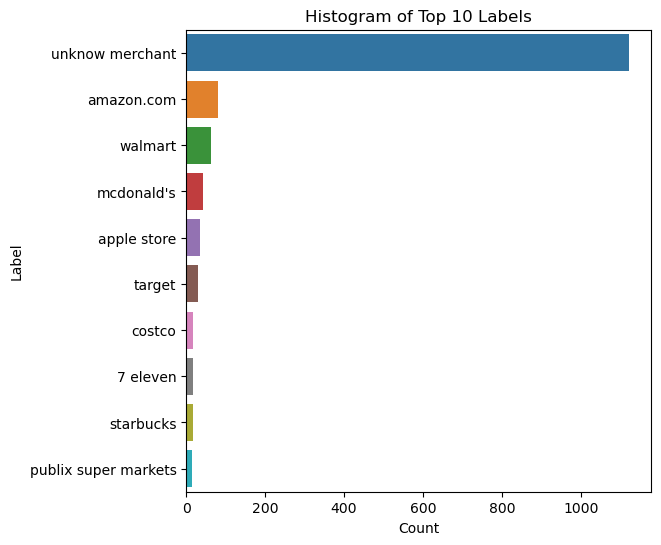

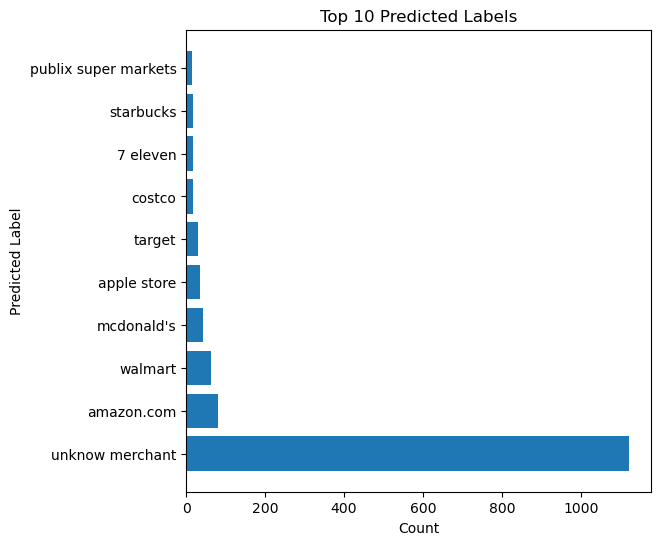

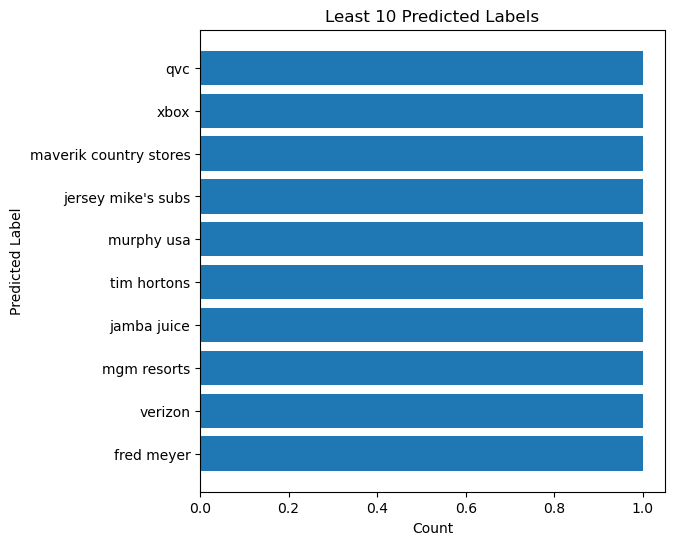

unknow merchant: 1122
amazon.com: 81
walmart: 62
mcdonald's: 43
apple store: 35
target: 29
costco: 18
7 eleven: 18
starbucks: 17
publix super markets: 16


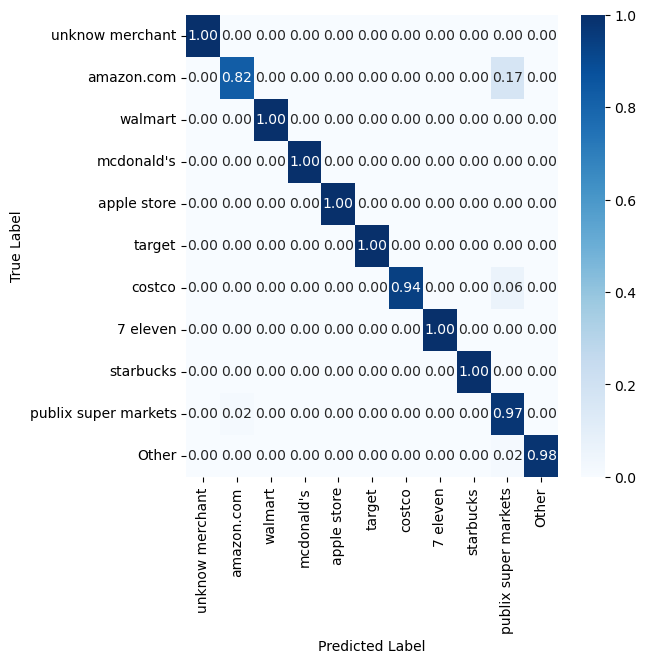



                                precision    recall  f1-score   support

              24 hour fitness       0.00      0.00      0.00         1
                     7 eleven       1.00      1.00      1.00        18
                     abebooks       0.00      0.00      0.00         1
    academy sports + outdoors       1.00      1.00      1.00         1
                 ace hardware       1.00      0.50      0.67         2
        adt security services       1.00      1.00      1.00         2
           advance auto parts       0.00      0.00      0.00         2
                   albertsons       1.00      1.00      1.00         3
                         aldi       1.00      1.00      1.00         5
                         aldo       0.00      0.00      0.00         1
                     allstate       1.00      1.00      1.00         2
                 amazon prime       0.00      0.00      0.00         2
                   amazon.com       0.98      1.00      0.99        79
  

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [101]:
from sklearn.svm import LinearSVC

classifier2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), 
                        #('scaler', StandardScaler(with_mean=False)),
                        ('classifier', LinearSVC(C=1.0))])

result_test = train(classifier2, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

SVC = cls_acc
Stime = cls_time
# print("\n\nSVC: ", SVC)
# print("Time: ", Stime)
                                           

In [102]:
result_test.head(100)

,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
7653,%%%%% winco foods 165 2510 s r missoula mt,winco,winco
7865,external withdrawal venmo - %%%%% repayment,unknow merchant,unknow merchant
3226,withdrawal bill payment %%%%% paypal purasc 2211 north first s san jose ca %% card 15 7103 %% mcc 5732,unknow merchant,unknow merchant
5912,withdrawal signature base %%%%% mcdonalds 17022 170- 3 nv date 02/17/23 89765 5814 %% card 25 5635,mcdonald's,mcdonald's
8237,bp-directv billpay %%%%% nan,directv,bp amoco
...,...,...,...
896,withdrawal pos %%%%% sheetz 0189 1505 pittsburgh st cheswick pa,sheetz,sheetz
663,withdrawal dollar-general 7616 %%%%% bell fl date 03/16/23 5331 %% card 25 6469 %% mcc 5331,dollar general,dollar general
1744,pos deb 1912 06/16/22 13 kroger 493 1075 spillway ci. %%%%% nan,kroger,kroger
1102,debit card debit %%%%% ref auth 07-14-2022 mcdonald.s 31450 mandan nd eff. date:,mcdonald's,mcdonald's


In [103]:
df_result_test = pd.DataFrame(result_test)

In [104]:
result_csv = df_result_test.head(200)

In [105]:
result_csv

,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
7653,%%%%% winco foods 165 2510 s r missoula mt,winco,winco
7865,external withdrawal venmo - %%%%% repayment,unknow merchant,unknow merchant
3226,withdrawal bill payment %%%%% paypal purasc 2211 north first s san jose ca %% card 15 7103 %% mcc 5732,unknow merchant,unknow merchant
5912,withdrawal signature base %%%%% mcdonalds 17022 170- 3 nv date 02/17/23 89765 5814 %% card 25 5635,mcdonald's,mcdonald's
8237,bp-directv billpay %%%%% nan,directv,bp amoco
...,...,...,...
408,withdrawal debit signature %%%%% happy nutrition 1000 tanner ford,unknow merchant,unknow merchant
3975,ckcd debit 0533 07/26 00:00 patient pa y se grand rapids mi %%%%% nan,unknow merchant,unknow merchant
5759,pos deb 1810 09/02/22 78 murphy7452atwalmart meridianms %%%%% 0,murphy usa,unknow merchant
3901,electronic withdrawal %%%%% von maur bill paymt,von maur,unknow merchant


In [106]:
# save the dataframe to a CSV file
result_csv.to_csv('result_csv_MIX.csv', index=False)

In [107]:
import pandas as pd
pd.set_option('display.max_rows', 200)

In [108]:
result_csv.head(100)

,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
7653,%%%%% winco foods 165 2510 s r missoula mt,winco,winco
7865,external withdrawal venmo - %%%%% repayment,unknow merchant,unknow merchant
3226,withdrawal bill payment %%%%% paypal purasc 2211 north first s san jose ca %% card 15 7103 %% mcc 5732,unknow merchant,unknow merchant
5912,withdrawal signature base %%%%% mcdonalds 17022 170- 3 nv date 02/17/23 89765 5814 %% card 25 5635,mcdonald's,mcdonald's
8237,bp-directv billpay %%%%% nan,directv,bp amoco
3004,amazon.com hd3r amazon.com %%%%% seattle waus : pos transaction,amazon.com,amazon.com
5736,withdrawal home banking %%%%% transfer to loan 4167 internet banking 02/24/2023 10:03,unknow merchant,unknow merchant
8290,ebay o 24-09156-97099 408-3 us %%%%% 0,ebay,ebay
9946,point of sale withdrawal ic %%%%% costco by instawww.costco.co caus,costco,costco
7295,withdrawal %%%%% pos 1008 1558 59690 belleview drive plaquemine la eff. date:,unknow merchant,unknow merchant


In [109]:
df_known_class_pred

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
0,Tb4ca9ff87e3530229e5bbd8c7db1584c,withdrawal home banking %%%%% transfer to loan 04 internet access 03/21/2023 08:33,unknow merchant
1,Tc964706bddbd3e73887d20259c1e2a3f,pos withdrawal (fis) scotties %%%%% pub scotties pub fall river ma(1737),unknow merchant
2,Ta9c6c455b4dd3468b34a7cf1b4664f68,debit card debit %%%%% 03-17-2023 www.target.com brooklyn park mn auth,target
3,T5d329e1f27bf33d78118e048504e17f1,withdrawal pfcu check card %%%%% axs.comlive event 888-929-7849 ca date 01/19/23 92705 7922 %% card 30 4351,unknow merchant
4,Te2228303ae563e96bd3b6d7a63a39dce,purchase %%%%% auth 02-18-2023 starbucks store reno nv,starbucks
...,...,...,...
9995,T2c7cdb48985e3569a524f219b7ec3a4a,withdrawal signature base %%%%% best storage henderson 702- 7 nv date 01/25/23 05360 4225 %% card 25 0531,unknow merchant
9996,Tb1b031f37d4e3ce0a8694effead5bc8d,pos purchase on 00/00 00:00 %%%%% location + atm hst not av ailable,unknow merchant
9997,T288890865e0a3d029f800ee550fcd48a,card purchase %%%%% texas roadhouse fr 21 5812 (2023-03-17) port authur tx 13,texas roadhouse
9998,Tdbf944aa317a30639b0fd6b45734d099,tst costa vida - pays pays us %%%%% nan,unknow merchant


In [110]:
result_csv

,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
7653,%%%%% winco foods 165 2510 s r missoula mt,winco,winco
7865,external withdrawal venmo - %%%%% repayment,unknow merchant,unknow merchant
3226,withdrawal bill payment %%%%% paypal purasc 2211 north first s san jose ca %% card 15 7103 %% mcc 5732,unknow merchant,unknow merchant
5912,withdrawal signature base %%%%% mcdonalds 17022 170- 3 nv date 02/17/23 89765 5814 %% card 25 5635,mcdonald's,mcdonald's
8237,bp-directv billpay %%%%% nan,directv,bp amoco
3004,amazon.com hd3r amazon.com %%%%% seattle waus : pos transaction,amazon.com,amazon.com
5736,withdrawal home banking %%%%% transfer to loan 4167 internet banking 02/24/2023 10:03,unknow merchant,unknow merchant
8290,ebay o 24-09156-97099 408-3 us %%%%% 0,ebay,ebay
9946,point of sale withdrawal ic %%%%% costco by instawww.costco.co caus,costco,costco
7295,withdrawal %%%%% pos 1008 1558 59690 belleview drive plaquemine la eff. date:,unknow merchant,unknow merchant


In [111]:
# from sklearn.linear_model import SGDClassifier

# classifier = Pipeline([
#     ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
#     ('scaler', StandardScaler(with_mean=False)),
#     ('classifier', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=1000, tol=1e-3)),
# ])

# train(classifier, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

- K-Nearest Neighbors

In [112]:
# from sklearn.neighbors import KNeighborsClassifier

# classifier4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
#                         ('classifier', KNeighborsClassifier(n_neighbors=5))])

# train(classifier4, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

# KNN = cls_acc
# Ktime = cls_time
# print("\n\nKNN: ", KNN)
# print("Time: ", Ktime)
